**runDM**

*With runDMC, it's Tricky. With runDM, it's not.*

`runDM` is a tool for calculating the low energy couplings of Dark Matter (DM) to light quarks in Simplified Models with vector mediators. By specifying the mass of the mediator and the couplings of the mediator to SM fields at high energy, the code outputs the low energy couplings to up, down and strange quarks, taking into account the mixing of all dimension-6 operators.

In [3]:
%matplotlib inline
import numpy as np
import matplotlib
from matplotlib import pyplot as pl

import runDM

First, let's specify the couplings at high energy. This will be an 1-D array with 16 elements. `runDM` comes with a number of pre-defined benchmarks, which can be accessed using `setBenchmark`.

In [4]:
c_high = runDM.setBenchmark("UniversalVector")
print "Vector coupling to all SM fermions:", c_high

c_high = runDM.setBenchmark("QuarksAxial")
print "Axial-vector coupling to all quarks:", c_high

Vector coupling to all SM fermions: [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.]
Axial-vector coupling to all quarks: [-1.  1.  1.  0.  0. -1.  1.  1.  0.  0. -1.  1.  1.  0.  0.  0.]


Alternatively, you can specify each coupling individually. You can use InitCouplings() to generate an empty array of couplings and then go ahead.

In [4]:
c_high = runDM.initCouplings()
c_high[0] = 1.0
c_high[1] = -1.0
c_high[12] = 1.0
print "User-defined couplings:", c_high

User-defined couplings: [ 1. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]


From these high energy couplings (defined at energy $E_1$), you can obtain the couplings to light quarks at energy $E_2$ by using `lightqCouplings(c, E1, E2)`:

In [5]:
E1 = 1000
E2 = 1
c_q = runDM.lightqCouplings(c_high, E1, E2)

The output is an array with 6 elements, the vector and axial-vector couplings to the light quarks: $c_q = \left(c_V^{(u)}, c_V^{(d)},c_V^{(s)}, c_A^{(u)}, c_A^{(d)},c_A^{(s)}\right)$. Let's print them out:

In [6]:
couplings_str = ['c_V^u','c_V^d','c_V^s','c_A^u','c_A^d','c_A^s']

for k in range(6):
    print couplings_str[k], "=", c_q[k]

c_V^u = 0.00733798843599
c_V^d = 0.496349047822
c_V^s = -0.00365095217817
c_A^u = -0.99996391592
c_A^d = -0.50003608408
c_A^s = -3.60840796558e-05


Now, let's take a look at the value of the low energy couplings (evaluated at $\mu_N \sim 1 \, \mathrm{GeV}$) as a function of the mediator mass $m_V$. 

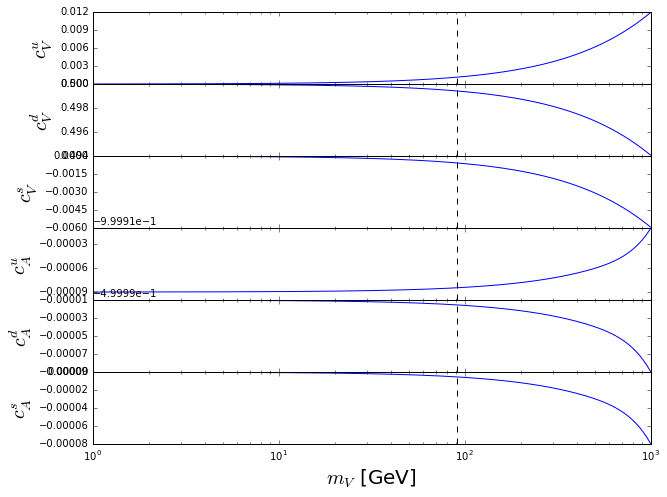

In [42]:
mV = np.logspace(0, 5, 1000)
c_q = np.zeros([1000,6])

for i in range(1000):
    c_q[i,:] = runDM.lightqCouplings(c_high, mV[i], 1.0)

#Now let's do some plotting
f, ax = pl.subplots(6, sharex=True, figsize=(10,8))

for k in range(6):
    ax[k].semilogx(c_q[:,k])
    ax[k].set_xlabel(r'$m_V$ [GeV]', fontsize=20.0)
    ax[k].set_ylabel(r'$'+couplings_str[k]+'$', fontsize=20.0)
    ax[k].yaxis.set_major_locator( matplotlib.ticker.MaxNLocator(nbins=4) )
    ax[k].axvline(91.1875, color='k', linestyle='--')
f.subplots_adjust(bottom=0.15, top=0.9,hspace=0)
